# **A. DATA *UNDERSTANDING***

Data *Understanding* adalah tahapan untuk mendapatkan pemahaman awal mengenai data yang dibutuhkan untuk memecahkan permasalahan bisnis yang diberikan

*   Data yang digunakan pada proyek kali ini adalah *Heart Failure Prediction* 
*   Dataset bersumber dari *repository dataset* kaggle.com dengan *link* berikut : https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction, dan proses pengunduhan dilakukan melalui Kaggle API
*   Dataset ini cukup bersih dan isi kolom-kolom sudah sesuai dengan tipe data tetapi memiiliki beberapa kesalahan pengisian nilai data, sehingga harus diperbaiki.
*   Dataset ini berisi 918 data kumpulan data penyakit jantung dengan 12 variabel yang terdiri dari 7 variabel numerik bertipe *integer*(6),dan *float*(1), serta variabel kategorikal bertipe *object*(5)
*   Dataset yang digunakan untuk kurasinya adalah: 
1. Cleveland: 303 observasi 
2. Hungaria 294 observasi 
3. Swiss: 123 observasi 
4. Long Beach VA: 200 observasi 
5. Stalog (Heart) Data Set: 270 observasi 

*   Total: 1190 observasi, Duplikat: 272 observasi Dataset akhir: 918 observasi 
*   Setiap dataset yang digunakan dapat ditemukan di bawah *Index of heart disease datasets* dari *UCI Machine Learning Repository* di tautan berikut: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/




Adapun variabel-variabel yang terdapat pada dataset adalah :

1. *Age*: Umur pasien [Tahun]
2. *Sex*: Jenis kelamin Pasien [M: *Male*, F: *Female*]
3. *ChestPainType*: Tipe sakit dada yang dirasakan pasien [TA: *Typical Angina*, ATA: *Atypical Angina*, NAP: *Non-Anginal Pain*, ASY: *Asymptomatic*]
4. *RestingBP* : *resting blood pressure*/tekanan darah dalam keadaan istirahat [mm Hg]
5. *Cholesterol: serum cholesterol* [mm/dl]
6. *FastingBS: fasting blood sugar*/ gula darah puasa. [1: *if FastingBS* > 120 mg/dl, 0: *otherwise*]
7. *RestingECG: resting electrocardiogram results*/hasil elektrokardiogram selama istirahat[Normal: Normal, ST: *having ST-T wave abnormality* (T *wave inversions and/or ST elevation or depression of* > 0.05 mV), LVH: *showing probable or definite left ventricular hypertrophy by Estes' criteria*]
8. *MaxHR: maximum heart rate achieved*/detak jantung maksimum yang dicapai [*Numeric value between 60 and 202*]
9. *ExerciseAngina: exercise-induced angina*/Ukuran boolean yang menunjukkan apakah latihan *angina* induksi telah terjadi  [Y: Yes, N: No]
10. *Oldpeak: oldpeak* = ST [*Numeric value measured in depression]*/segmen ST yang diperoleh dari latihan relatif terhadap istirahat 
11. *ST_Slope: the slope of the peak exercise. ST segment* : kemiringan segmen ST untuk latihan maksimum (puncak). Terdapat tiga jenis nilai, 1. *Up: upsloping*, 2. *Flat: flat*, 3.*Down: downsloping*]
12. *HeartDisease: output class* [1: *heart disease*, 0: Normal]

Berikut penjelasan dan pengertian beberapa istilah medis diatas :  

1. *Typical Angina(TA)*  adalah  kondisi  rekam  medis  pasien  menunjukkan  gejala  umum  nyeri  dada  sehingga  kemungkinan  memiliki penyumbatan arteri koroner yang tinggi.  

2. *Atypical Angina(ATA)*  adalah  kondisi  dimana  gejala  pasien  tidak  rinci  sehingga  kemungkinan penyumbatan lebih rendah. 

3.  *Non-Anginal Pain(NAP)* adalah rasa sakit  yang  menusuk  seperti  pisau atau kondisi menyakitkan yang dapat berlangsung dalam jangka  waktu pendek atau panjang.

4. *Asymptomatic pain (ASY)* tidak    menunjukkan    gejala    penyakit    dan  kemungkinan  tidak  akan menyebabkan atau menunjukkan gejala penyakit.  

5. *RestingECG* :  Hasil  ECG  selama  istirahat  : normal (memiliki kelainan gelombang ST-T/*inversi gelombang T dan / atau elevasi ST atau depresi > 0,05 mV), LVH : menunjukkan kemungkinan atau pasti  hipertrofi ventrikel.

# **B. DATA *LOADING***

### ***1. Import Semua Library yang Diperlukan***

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets
from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

### ***2. Import Dataset***

Ada banyak cara untuk mengimport dataset dari Kaggle.com. Supaya lebih efektif pada proyek kali ini kita import dataset menggunakan Kaggle API agar tidak selalu *upload* file ketika menjalankan ulang *runtime* yang terputus. cara ini sangat membantu ketika kita menggunakan khususnya apabila kita menggunakan dataset yang berukuran besar.

* Jalankan perintah berikut untuk mengakses Kaggle *API*

In [2]:
! pip install -q kaggle

* Import *file* kaggle.json dari *local drive*

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adillatifhabibi","key":"70adc949012360de5ec4a5679c518be7"}'}

* Membuat direktori untuk file kaggle.json
* *Copy*-kan file json yang telah diimport ke direktori yang baru dibuat

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

* Ketikkan perintah berikut untuk mengecek apakah proses import dari kaggle telah berhasil

In [5]:
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           2820         81  1.0              
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                      9KB  2022-10-06 08:55:25          19203        539  1.0              
thedevastator/jobs-dataset-from-glassdoor                       Salary Prediction                                     3MB  2022-11-16 13:52:31           2029         57  1.0              
fuarresvij/gdp-growth-around-the-globe                      

* Mengganti *permission file*

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

* *Download* dataset yang akan digunakan dalam proyek ini, yaitu *heart-failure-prediction.zip*

In [7]:
! kaggle datasets download fedesoriano/heart-failure-prediction

  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 7.39MB/s]


* Ekstrak *file.zip* yang telah berhasil diunduh


In [8]:
! unzip heart-failure-prediction.zip

Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


* Buka *file csv* dengan pandas .read_csv()

In [9]:
df = pd.read_csv('heart.csv')

# **C. *EXPLORATORY* DATA *ANALYSIS***

### ***3. Deskripsi Variabel***

Pada tahapan ini kita akan melihat dataset secara umum, menganalisis dan pengecekan awal apakah data yang kita miliki sudah memiliki kondisi yang diharapkan sehingga nantinya data layak untuk diproses lebih lanjut ke tahap preprocessing. Pengecekan antara lain meliputi tipe data, distribusi variabel yang ada, *missing value*, dan data duplikat.

* Cek info dataset dengan fitur .info() untuk mengetahui apa saja variabel serta tipe variabelnya dan panjang data di dalam dataset


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


* Menampilkan sampel 10 dataset teratas.

In [11]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


* Mengecek banyaknya data di dalam dataset

In [12]:
df.size 

11016

* Mengecek berapa banyak data duplikat yang ada di dalam dataset dan dimana posisinya, bagian ini penting untuk menghindari ketidakvalidan data

In [13]:
df.duplicated().sum()

0

* Pengecekan nilai yang kosong dengan fitur *.isnull()*

In [14]:
df.isnull().sum().to_frame().T

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,0,0,0,0,0,0,0,0,0,0,0


* Menampilkan deskripsi statistik data dengan fitur *.describe()*

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


* Jika diperhatikan pada tabel diatas, nilai minimal untuk *RestingBP* dan *Cholesterol* adalah 0. Ini merupakan kesalahan pengisian data, karena tidak mungkin ada pasien yang tidak memliki kadar kolesterol atau tidak memiliki tekanan darah. Maka sekarang kita harus cari dulu berapa banyak jumlah nilai yang salah tersebut, baru diputuskan apakah akan dibuang atau diisi dengan nilai *mean* variabelnya. 

In [16]:
RestingBP = (df.RestingBP == 0).sum()
Cholesterol	 = (df.Cholesterol	 == 0).sum()

print("Nilai 0 di kolom RestingBP ada: ", RestingBP)
print("Nilai 0 di kolom Cholesterol ada: ", Cholesterol)

Nilai 0 di kolom RestingBP ada:  1
Nilai 0 di kolom Cholesterol ada:  172


* Karena banyak nilai yang bernilai 0 pada variabel *Cholesterol*, maka kita *drop* saja baris yang berisi nilai 0 pada kolom *cholesterol*. Sebenarnya kita bisa menggunakan teknik lain, yaitu mengganti nilai tersebut dengan nilai *mean* atau rata-rata, tapi karena data sakit jantung adalah data sensitif dan variabel yang berkorelasi sangat banyak maka menurut hemat saya sangat berisiko untuk mengganti data dengan *mean* misalnya karena tidak akan menggambarkan kondisi yang sebenarnya dan bisa menyebabkan bias pada hasilnya. Begitu juga dengan nilai 0 pada *RestingBP*, kita buang saja dengan *.drop()*

*  *Drop* baris dengan nilai *'RestingBP', 'Cholesterol'* = 0 baris dengan nilai *'RestingBP', 'Cholesterol'* = 0

In [17]:
df = df.loc[(df[['RestingBP','Cholesterol']]!=0).all(axis=1)]
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


* Mari kita cek lagi deskripsi statistiknya dengan *.describe()*

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,746.0,52.882038,9.505888,28.0,46.00,54.0,59.0,77.0
RestingBP,746.0,133.022788,17.282750,92.0,120.00,130.0,140.0,200.0
Cholesterol,746.0,244.635389,59.153524,85.0,207.25,237.0,275.0,603.0
FastingBS,746.0,0.167560,0.373726,0.0,0.00,0.0,0.0,1.0
MaxHR,746.0,140.226542,24.524107,69.0,122.00,140.0,160.0,202.0
Oldpeak,746.0,0.901609,1.072861,-0.1,0.00,0.5,1.5,6.2
HeartDisease,746.0,0.477212,0.499816,0.0,0.00,0.0,1.0,1.0


###***4. Cek outliers menggunakan boxplot***

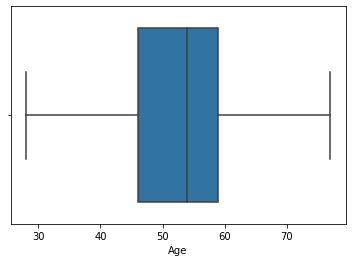

In [19]:
sns.boxplot(x=df['Age'])

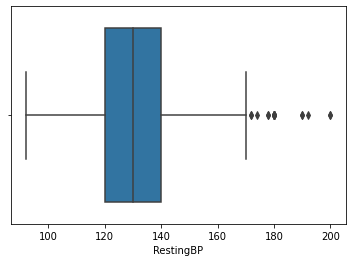

In [20]:
sns.boxplot(x=df['RestingBP'])

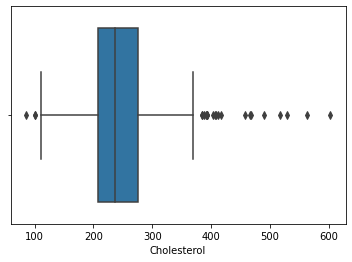

In [21]:
sns.boxplot(x=df['Cholesterol'])

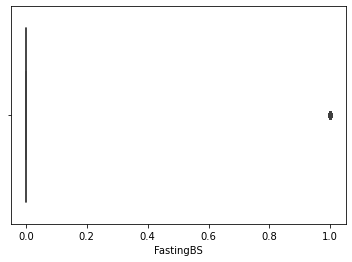

In [22]:
sns.boxplot(x=df['FastingBS'])

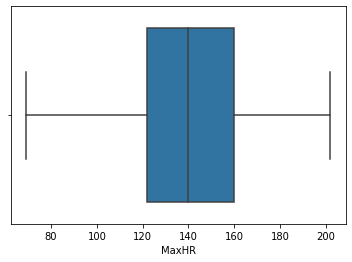

In [23]:
sns.boxplot(x=df['MaxHR'])

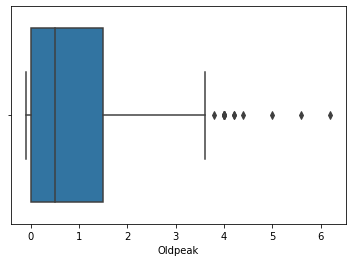

In [24]:
sns.boxplot(x=df['Oldpeak'])

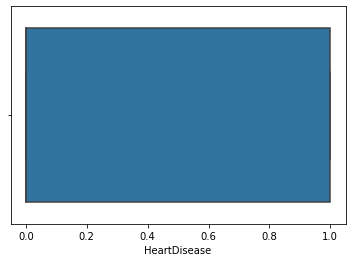

In [25]:
sns.boxplot(x=df['HeartDisease'])

### ***5. Analisis Univariate***

Analisis *univariate* dilakukan pada masing-masing variabel agar tiap variabel dari hasil pengamatan dapat dianalisa, diukur, diartikan sehingga didapatkan kesimpulan dan informasi yang berguna dari data tersebut.

* Kelompokkan variabel-variabel di dalam dataset untuk memudahkan analisa masing-masing variabel
* Pengelompokkan ini bersifat opsional, tidak baku, dan disesuaikan saja dengan dataset dengan kebutuhan analisis data.

In [26]:
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

#### *5.1. Categorical Features*

Analisa variabel-variabel pada *categorical_features*


* Analisa variabel *'Sex'*

   jumlah sampel  persentase
M            564     75.6032
F            182     24.3968


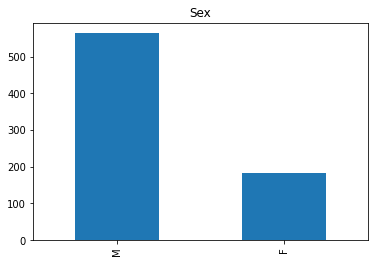

In [27]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
unicat_df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(4)})
print(unicat_df)
count.plot(kind='bar', title=feature);

* Analisa variabel *'ChestPainType'*

     jumlah sampel  persentase
ASY            370     49.5979
NAP            169     22.6542
ATA            166     22.2520
TA              41      5.4960


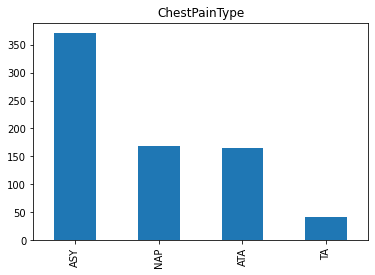

In [28]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
unicat_df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(4)})
print(unicat_df)
count.plot(kind='bar', title=feature);

* Analisa variabel *'RestingECG'*

        jumlah sampel  persentase
Normal            445     59.6515
LVH               176     23.5925
ST                125     16.7560


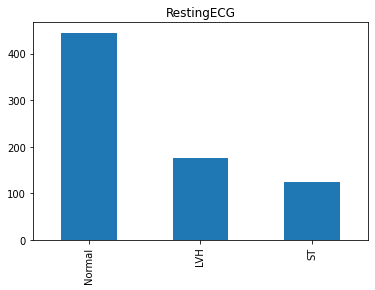

In [29]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
unicat_df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(4)})
print(unicat_df)
count.plot(kind='bar', title=feature);

* Analisa variabel *'ExerciseAngina'*

   jumlah sampel  persentase
N            459     61.5282
Y            287     38.4718


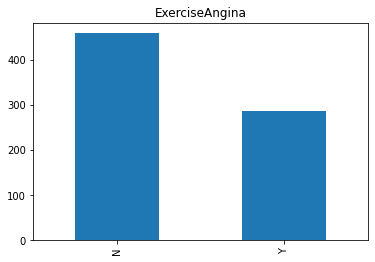

In [30]:
feature = categorical_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
unicat_df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(4)})
print(unicat_df)
count.plot(kind='bar', title=feature);

* Analisa variabel *'ST_Slope'*

      jumlah sampel  persentase
Flat            354     47.4531
Up              349     46.7828
Down             43      5.7641


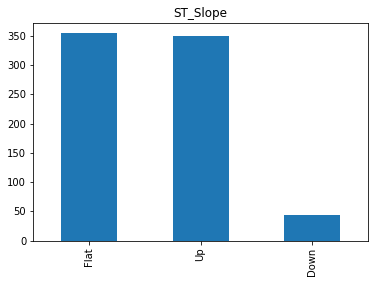

In [31]:
feature = categorical_features[4]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
unicat_df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(4)})
print(unicat_df)
count.plot(kind='bar', title=feature);

####*5.2. Numerical Features*

Analisa variabel-variabel pada *numerical_features*

* Analisa variabel-variabel pada *Numerical_Features* dengan melihat histogram masing-masing fiturnya

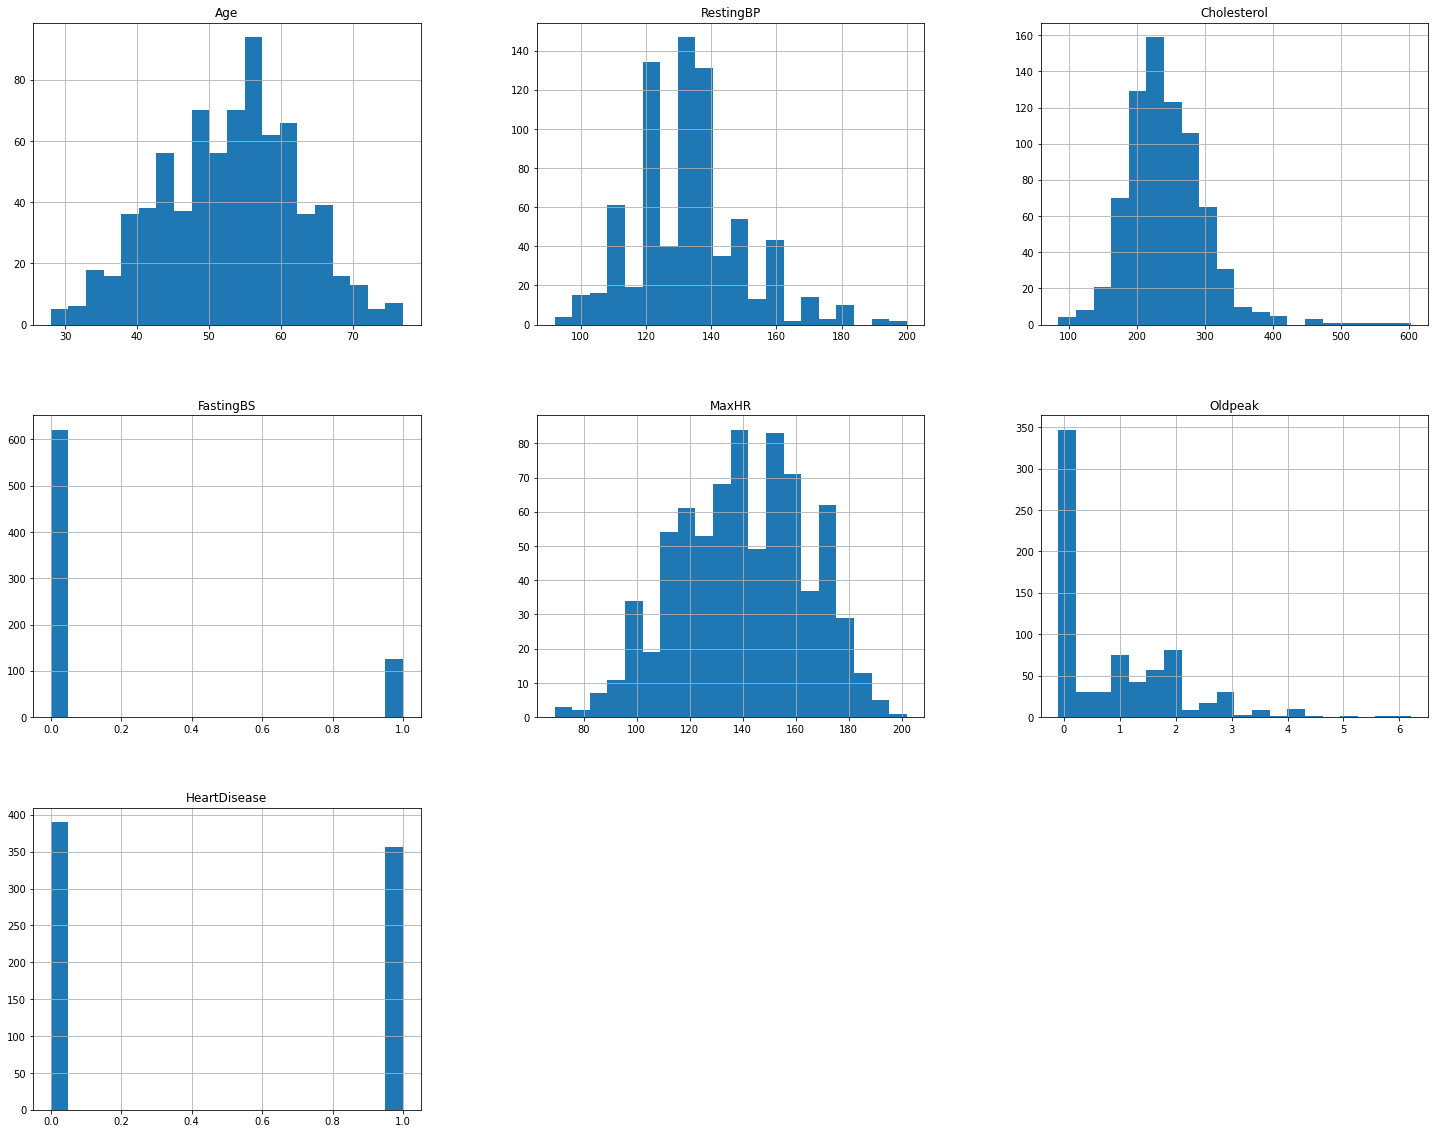

In [32]:
df.hist(bins=20, figsize=(25,20))
plt.show()

* Hitung jumlah yang sakit jantung dan tidak sakit jantung di dalam dataset karena pada diagaram diatas kita tidak melihat angkanya secara pasti. 
* Bagian ini penting diketahui untuk meyakinkan kita bahwa model akan dapat belajar dengan baik dengan data yang banyak.
* Variabel *'HeartDisease'* ini akan dijadikan target, dan variabel lainnya akan dijadikan fitur
* 1 = *heart disease*, 0 = normal

In [33]:
df.HeartDisease.value_counts()

0    390
1    356
Name: HeartDisease, dtype: int64

### ***6. Analisis Multivariate***

Analisis hubungan antara masing-masing variabel

#####*6.1. Analisa pasien sehat dan sakit jantung menggunakan diagram batang*

* Analisis hubungan antara masing-masing fitur kategorikal dengan target *(HeartDisease)*

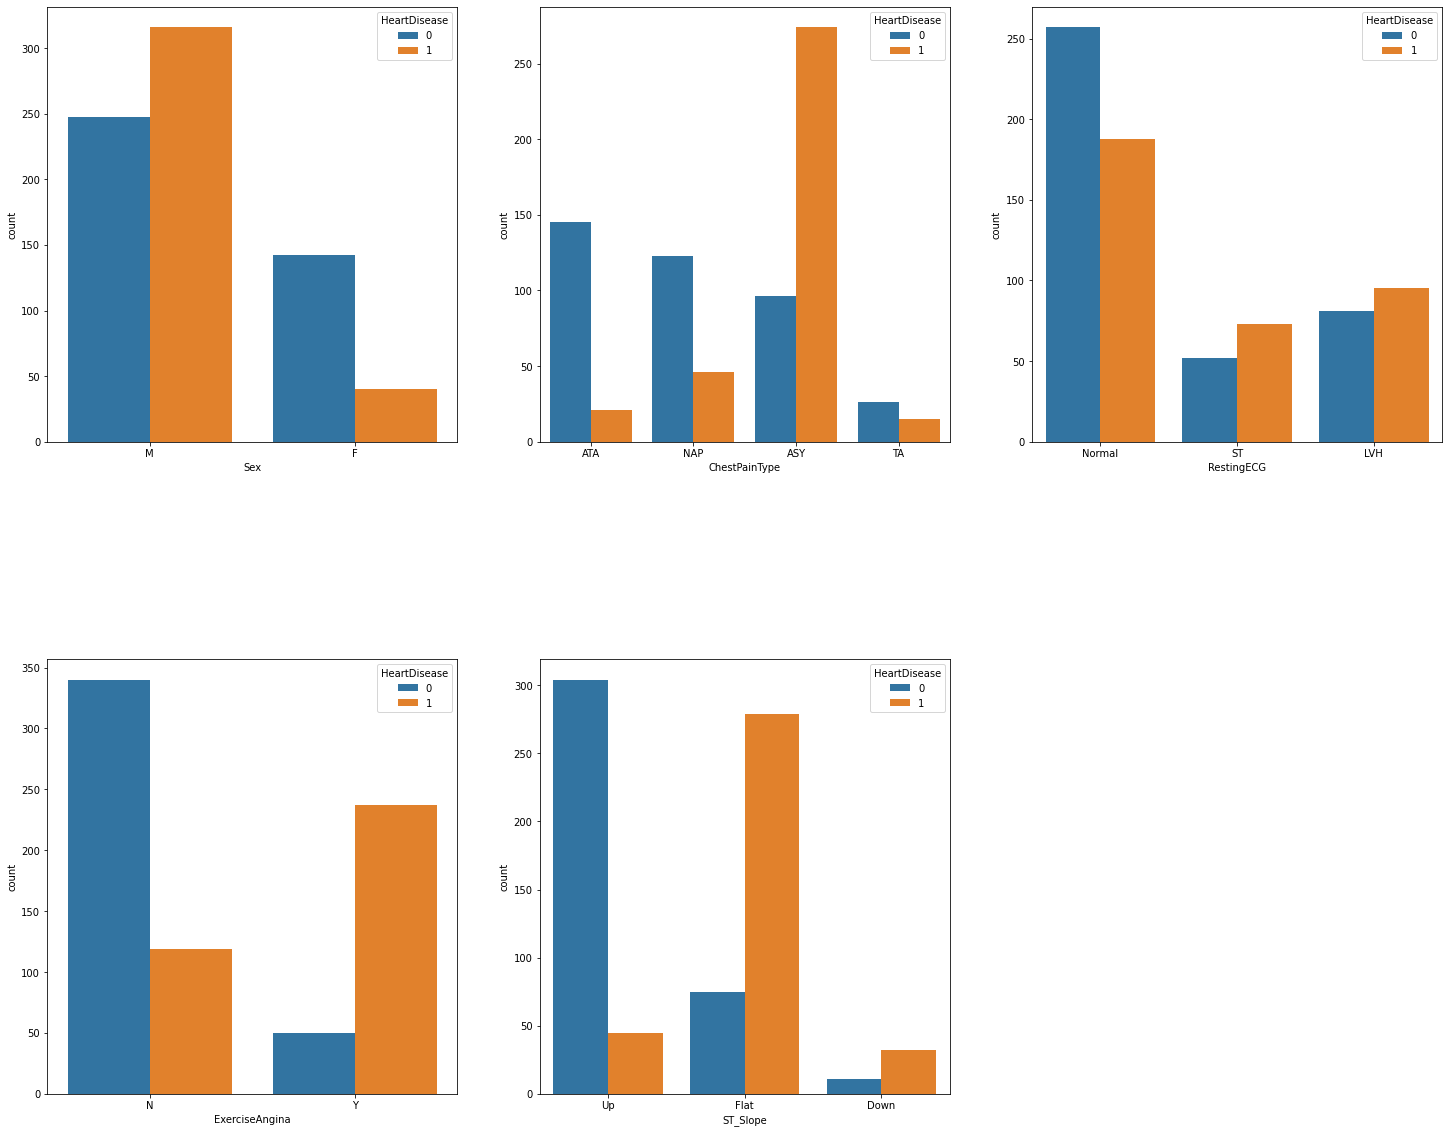

In [34]:
plt.figure(figsize=(25,20))
for i,col in enumerate(df.select_dtypes('object')):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df, x=col, hue='HeartDisease')
    plt.subplots_adjust(hspace=0.5)
plt.show()

#####*6.2. Analisa pasien sehat dan sakit jantung menggunakan boxplot*

* Analisis hubungan antara masing-masing fitur *numerical* (selain *HeartDisease*) dengan target *(HeartDisease)*

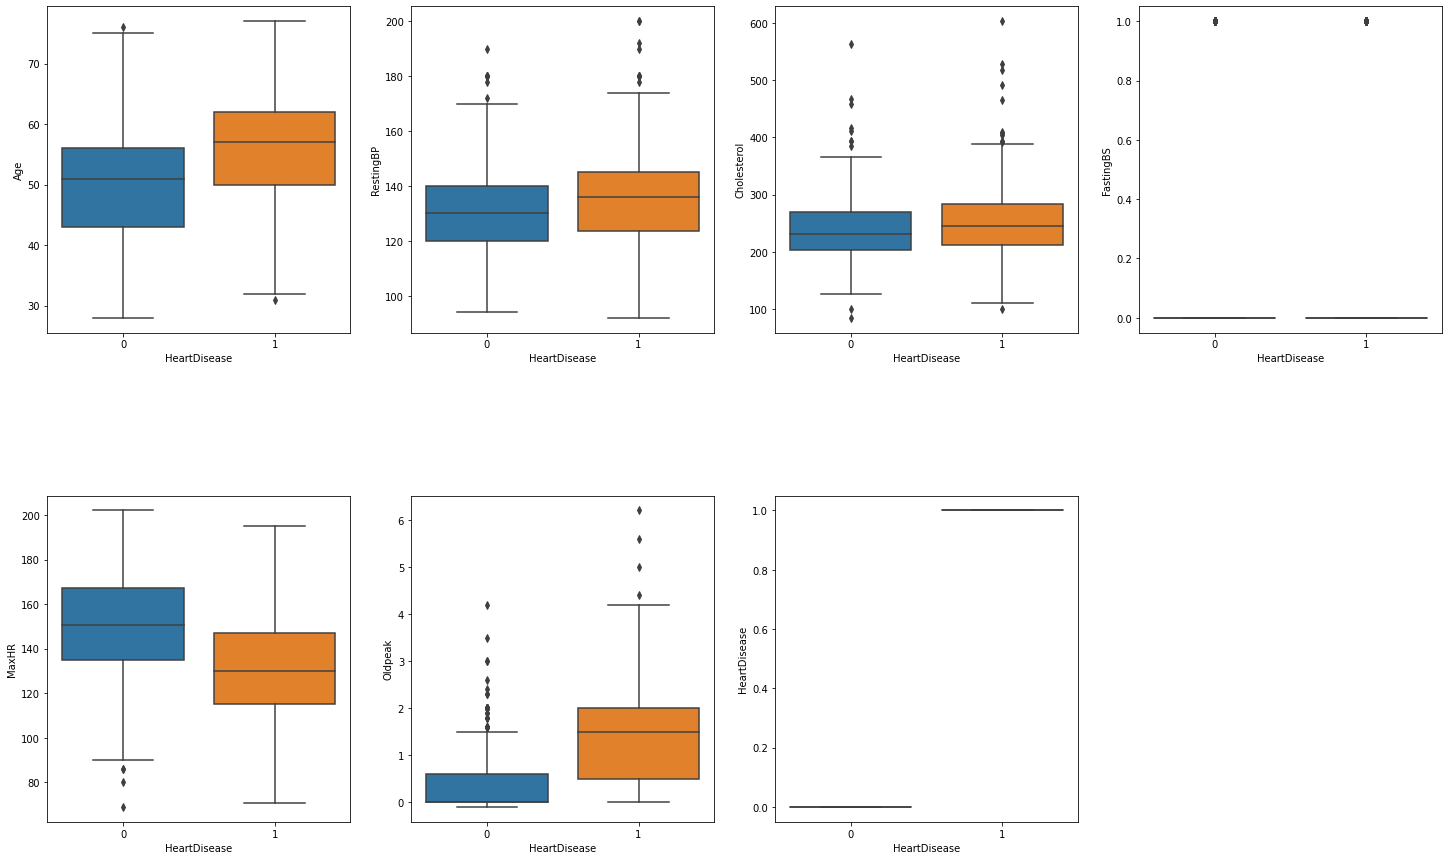

In [35]:
plt.figure(figsize=(25,15))
for i,col in enumerate(df.select_dtypes('number')):
    plt.subplot(2,4,i+1)
    sns.boxplot(data=df, y=col, x='HeartDisease')
    plt.subplots_adjust(hspace=0.5)
plt.show()

#####*6.3. Analisa sebaran data dengan pairplot*

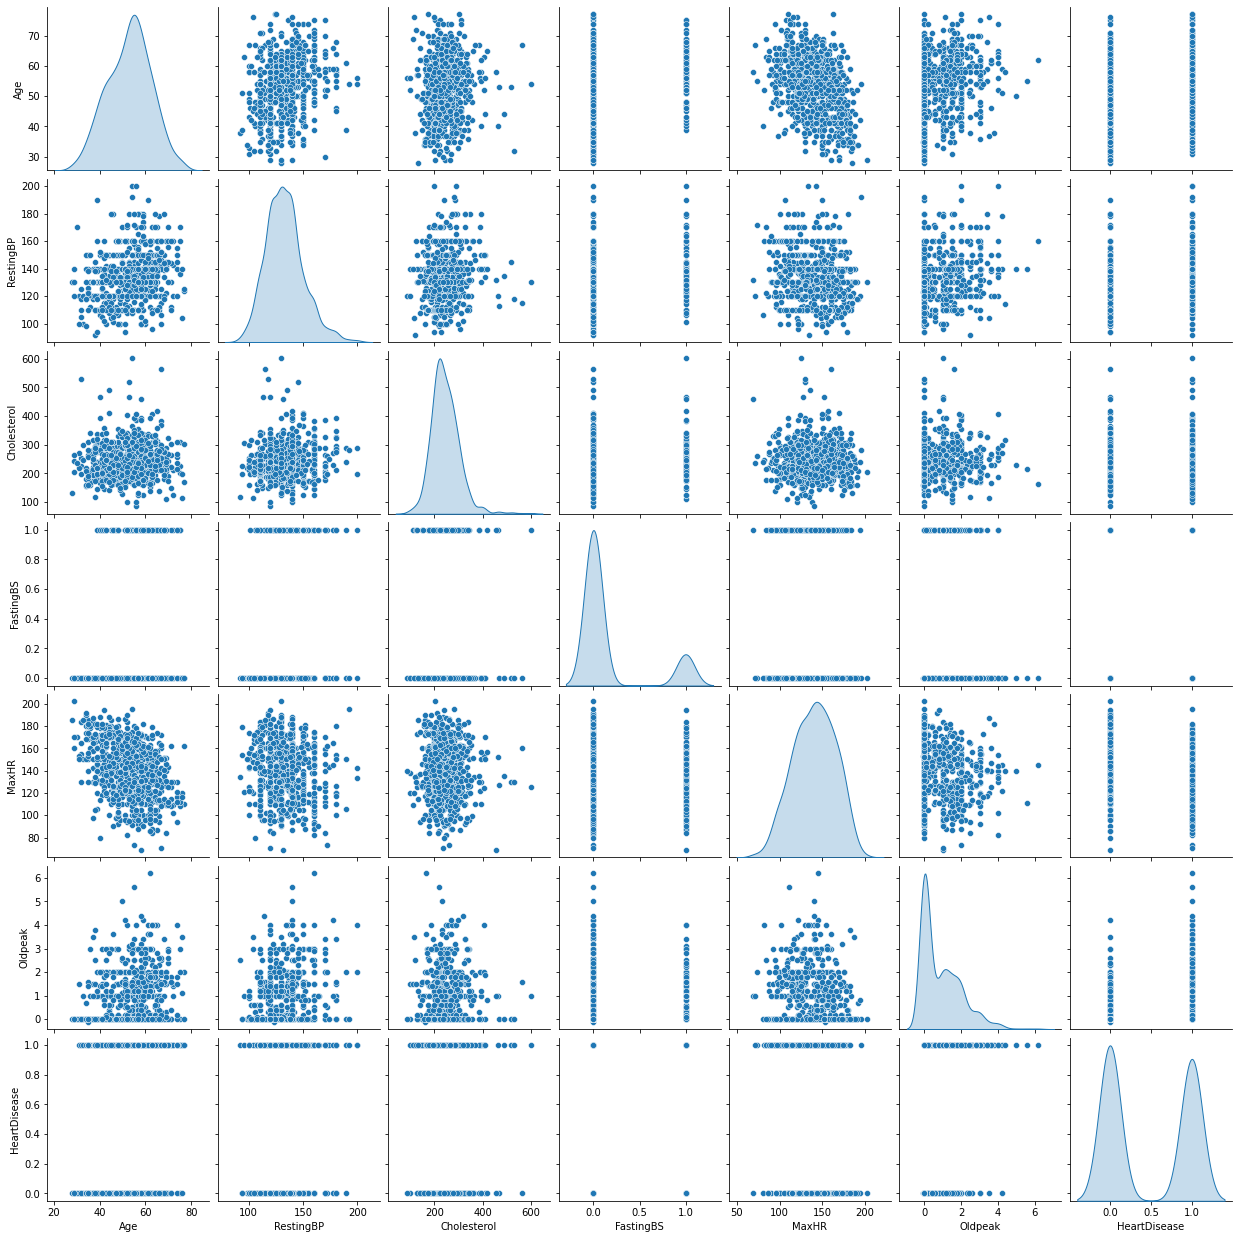

In [36]:
sns.pairplot(df, diag_kind = 'kde')

#####*6.4. Analisa kekuatan hubungan atau korelasi antara semua data pada dataset*

* Mari coba kita tampilkan korelasi antar variabel numerik dataset ini di dalam *heatmap* untuk mengetahui apa saja variabel yang berkorelasi kuat dan tidak kuat terhadap target *('HeartDisease)*

Text(0.5, 1.0, 'Correlation Matrix Antar Variabel ')

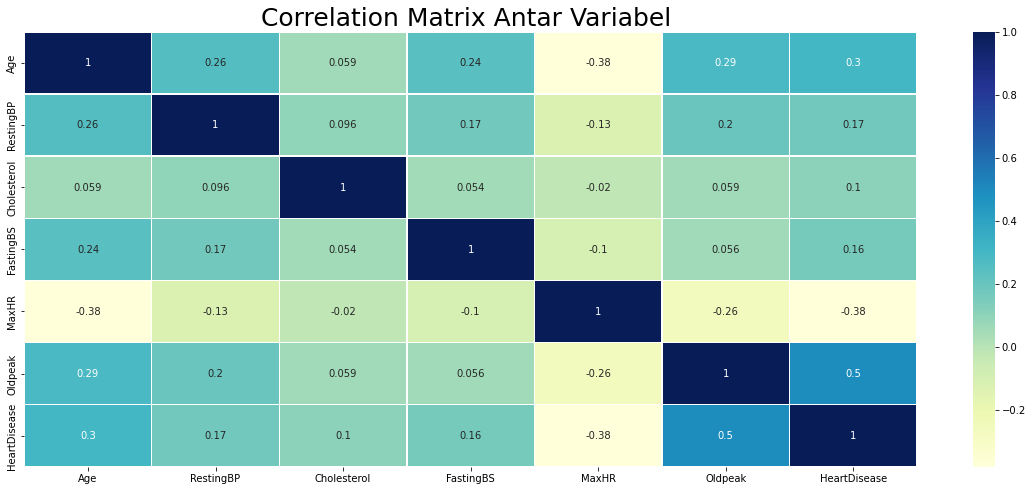

In [37]:
plt.figure(figsize=(20, 8))
corr = df.corr().round(4)

sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidths=0.5,)
plt.title("Correlation Matrix Antar Variabel ", size=25)

* Melihat Korelasi antar fitur dengan fitur .corr()

In [38]:
corr = df.corr().abs()['HeartDisease'].sort_values(ascending=False)
corr

HeartDisease    1.000000
Oldpeak         0.495696
MaxHR           0.377212
Age             0.298617
RestingBP       0.173242
FastingBS       0.160594
Cholesterol     0.103866
Name: HeartDisease, dtype: float64

# **D. *DATA PREPARATION***

• Menyebutkan teknik-teknik pada data *preparation* dan mengaplikasikannya pada dataset

• Menggunakan teknik secara berurutan, rapi, dan disertai dengan penjelasan   kenapa teknik dan tahapan-tahapan tersebut diperlukan pada tahap data *preparation*

• Penjelasan disertakan pada masing-masing *cell.*




###***7. One Hot Encoding***

* *Encoding* data dengan *One Hot Encoding* karena terdapat data kategorikal yang akan diolah. Komputer tidak bisa mengolah data kategorikal sehingga kita perlu mengubahnya menjadi bentuk bilangan.

In [39]:
df = pd.concat([df, pd.get_dummies(df['Sex'], prefix='Sex')],axis=1)
df = pd.concat([df, pd.get_dummies(df['ChestPainType'], prefix='ChestPainType')],axis=1)
df = pd.concat([df, pd.get_dummies(df['RestingECG'], prefix='RestingECG')],axis=1)
df = pd.concat([df, pd.get_dummies(df['ExerciseAngina'], prefix='ExerciseAngina')],axis=1)
df = pd.concat([df, pd.get_dummies(df['ST_Slope'], prefix='ST_Slope')],axis=1)
df.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1, inplace=True)

###***8. Split Dataset***

* Kelompokkan variabel mana saja yang akan menajadi variabel x dan variabel y
   dalam *project* ini x(fitur) = selain variabel *'HeartDisease'*, dan y(target) = *'HeartDisease'.*



In [40]:
x = df.iloc[:,:-1]
y = df['HeartDisease']

* Gunakan *train-test-split* untuk membagi varibel x, dan y menjadi data latih dan data uji/test/validasi
* Komposisi data latih dan data test adalah 70% data latih dan 30% data uji/test

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=7)

* Cek berapa jumlah variabel x dan y yang dibagi menjadi data latih dan data *test*

In [42]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((522, 20), (224, 20), (522,), (224,))

###***9. Lakukan Normalisasi data menggunakan StandardScaler***

* Untuk menghindari kebocoran data, maka untuk saat ini cukup *x_train*, dan *y_train* saja yang distandarisasi
* Gunakan *fit()* dan *transform()* 

In [43]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS','MaxHR', 'Oldpeak']
 
scaler = StandardScaler()
scaler.fit(x_train[numerical_features])
x_train[numerical_features] = scaler.transform(x_train.loc[:, numerical_features])
x_train[numerical_features].head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
50,-0.279523,-0.148769,-0.204021,-0.431699,-0.778465,1.060464
849,0.962272,-0.148769,-0.237814,-0.431699,0.249875,0.871406
155,0.341375,1.319787,1.637701,2.316431,0.414409,2.005754
417,-0.900420,-0.148769,-0.609537,-0.431699,-0.531663,-0.830117
663,1.376203,1.613498,0.015634,-0.431699,-0.819598,-0.830117


In [44]:
x_train.shape

(522, 20)

In [45]:
x_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat
50,-0.279523,-0.148769,-0.204021,-0.431699,-0.778465,1.060464,1,0,1,1,0,0,0,0,1,0,0,1,0,1
849,0.962272,-0.148769,-0.237814,-0.431699,0.249875,0.871406,0,0,1,0,0,1,0,0,1,0,1,0,0,1
155,0.341375,1.319787,1.637701,2.316431,0.414409,2.005754,1,0,1,1,0,0,0,0,1,0,0,1,0,1
417,-0.900420,-0.148769,-0.609537,-0.431699,-0.531663,-0.830117,0,0,1,1,0,0,0,0,0,1,1,0,0,0
663,1.376203,1.613498,0.015634,-0.431699,-0.819598,-0.830117,1,0,1,0,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,1.479686,1.143560,0.539427,-0.431699,1.319347,-0.830117,0,1,0,0,0,1,0,0,1,0,1,0,0,0
674,0.962272,-0.736191,0.607013,-0.431699,-1.518869,0.493289,1,0,1,0,1,0,0,1,0,0,1,0,0,1
709,-0.072557,-0.442480,-0.558848,-0.431699,1.154813,0.115173,1,0,1,1,0,0,0,0,1,0,1,0,0,0
196,-0.383006,-0.736191,0.877357,-0.431699,-0.325995,0.115173,0,0,1,1,0,0,0,0,1,0,1,0,0,1


In [46]:
x_train_scaled = x_train
x_train_scaled.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat
50,-0.279523,-0.148769,-0.204021,-0.431699,-0.778465,1.060464,1,0,1,1,0,0,0,0,1,0,0,1,0,1
849,0.962272,-0.148769,-0.237814,-0.431699,0.249875,0.871406,0,0,1,0,0,1,0,0,1,0,1,0,0,1
155,0.341375,1.319787,1.637701,2.316431,0.414409,2.005754,1,0,1,1,0,0,0,0,1,0,0,1,0,1
417,-0.900420,-0.148769,-0.609537,-0.431699,-0.531663,-0.830117,0,0,1,1,0,0,0,0,0,1,1,0,0,0
663,1.376203,1.613498,0.015634,-0.431699,-0.819598,-0.830117,1,0,1,0,1,0,0,0,1,0,0,1,0,1


# **E. MODEL *DEVELOPMENT***

• Membuat dan merancang model *machine learning* yang tepat agar dapat memberikan solusi permasalahan.

• Menjelaskan apa saja parameter yang digunakan pada model dan fungsi dari penggunaan parameter tersebut

• Menjelaskan kelebihan dan kekurangan algoritma *machine learning* yang digunakan.

• Memberikan penilaian akurasi dari setiap model yang digunakan terhadap data *test* untuk mengetahui model mana yang memberikan hasil akurasi terbaik.



###***10. Beberapa model yang akan digunakan dan diuji pada proyek ini***


1.   *Random Forest* 
2.   *K-Nearest Neighbour (KNN*)
3.   *Decision Tree*
4.   *Support Vector Machine (SVM)* 




####***10.1. Random Forest.***

* Definisikan model dan tentukan parameter model *Random Foerest* (jika diperlukan/sesuai kebutuhan)

In [47]:
rf_model = RandomForestClassifier(n_estimators=5, max_depth=25, random_state=3, n_jobs=1)
rf_model.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=25, n_estimators=5, n_jobs=1, random_state=3)

####***10.2. K-Nearest Neighbour / KNN.***

* Definisikan model dan tentukan parameter model *K-Nearest Neighbour/KNN* (jika diperlukan/sesuai kebutuhan)

In [48]:
knn_model= KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

####***10.3. Decision Tree***

* Definisikan model dan tentukan parameter model *Decision Tree* (jika diperlukan/sesuai kebutuhan)

In [49]:
dtc_model = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5, min_samples_leaf=5)
dtc_model.fit(x_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

####***10.4. Support Vector Machine/SVM***




* Definisikan model dan tentukan parameter model *SVM* (jika diperlukan/sesuai kebutuhan)

In [50]:
svm_model = svm.SVC(C=10, gamma=0.3)
svm_model.fit(x_train_scaled, y_train)

SVC(C=10, gamma=0.3)

# **F. EVALUASI MODEL**

* Menyebutkan dan menjelaskan metrik evaluasi yang digunakan dan mengukur kinerja model berdasarkan hasil/nilai yang didapatkan dari prediksi model metrik evaluasi tersebut

* Menjelaskan bagaimana metrik tersebut bekerja.

Metrik evaluasi yang digunakan pada proyek ini adalah :

1. *Accuracy*

2. *Precision (Positive Predictive Value)* 

3. *Recall atau Sensitivity* (True Positive Rate)*  

4. *F1-Score*


###***11. Lakukan Standarisasi pada x_test***

* Standardisasi pada x_*test.*
* Pada tahapan ini kita hanya melakukan fungsi *.transform()* saja tanpa *fit()*. 
* Menggunakan *fit_transform()* adalah sebuh kesalahan karena akan melatih x_*test* tersebut.

In [51]:
x_test.loc[:, numerical_features] = scaler.transform(x_test[numerical_features])
x_test_scaled = x_test

In [52]:
x_test.shape

(224, 20)

###***12. Cek akurasi  masing-masing model dengan accuracy_score, classification report dan confusion matrix***

####***12.1. Random Forest***

accuracy score model =  0.9955357142857143
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       119
           1       0.99      1.00      1.00       105

    accuracy                           1.00       224
   macro avg       1.00      1.00      1.00       224
weighted avg       1.00      1.00      1.00       224



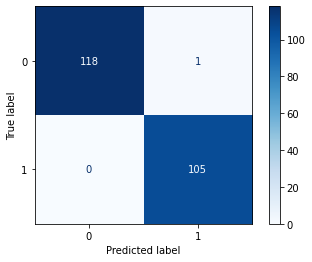

In [53]:
y_preds_rf = rf_model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_preds_rf)
report = classification_report(y_test, y_preds_rf)
print('accuracy score model = ', accuracy)
print(report)
plot_confusion_matrix(rf_model, x_test_scaled, y_test,
                     cmap=plt.cm.Blues);

####***12.2. .K-Nearest Neighbor/KNN***

accuracy score model =  0.8839285714285714
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       119
           1       0.86      0.90      0.88       105

    accuracy                           0.88       224
   macro avg       0.88      0.88      0.88       224
weighted avg       0.88      0.88      0.88       224



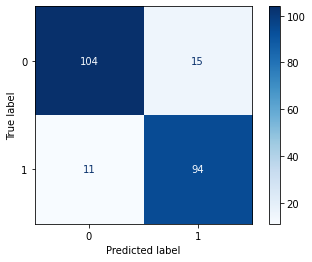

In [54]:
y_preds_knn = knn_model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_preds_knn)
report = classification_report(y_test, y_preds_knn)
print('accuracy score model = ', accuracy)
print(report)
plot_confusion_matrix(knn_model, x_test_scaled, y_test,
                     cmap=plt.cm.Blues);

####***12.3. Decision Tree***

accuracy score model =  1.0
classification report =                precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       105

    accuracy                           1.00       224
   macro avg       1.00      1.00      1.00       224
weighted avg       1.00      1.00      1.00       224



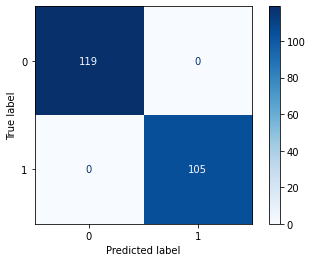

In [55]:
y_preds_dtc = dtc_model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_preds_dtc)
report = classification_report(y_test, y_preds_dtc)
print('accuracy score model = ', accuracy)
print('classification report = ', report)
plot_confusion_matrix(dtc_model, x_test_scaled, y_test,
                     cmap=plt.cm.Blues);

####***12.4. Support Vector Machine/SVM***

accuracy score model =  0.9732142857142857
classification report =                precision    recall  f1-score   support

           0       1.00      0.95      0.97       119
           1       0.95      1.00      0.97       105

    accuracy                           0.97       224
   macro avg       0.97      0.97      0.97       224
weighted avg       0.97      0.97      0.97       224



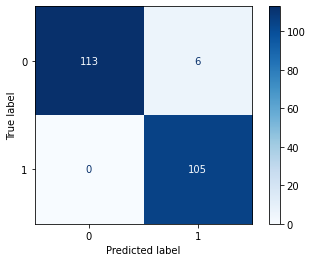

In [56]:
y_preds_svm = svm_model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_preds_svm)
report = classification_report(y_test, y_preds_svm)
print('accuracy score model = ', accuracy)
print('classification report = ', report)
plot_confusion_matrix(svm_model, x_test_scaled, y_test,
                     cmap=plt.cm.Blues);

# **KESIMPULAN** 

Berdasarkan nilai accuracy_score, visualisasi dari confusion_matrix dan metrik yang terdapat pada classification_report. Terlihat semua model mendapat akurasi skor melebihi 85% dengan nilai tertinggi oleh model Decision Tree yang mendapatkan akurasi skor 1 yang bisa ditafsirkan akurasi model 100% akurat. Tetapi pada kenyataannya nilai 1 bukanlah nilai yang ideal dan dikhawatirkan model tersebut mengalami *overfitting* dan terdapat masalah pada model. 
oleh karena itu, dengan membandingkan nilai akurasi antar model, dan berbagai tahapan evaluasi maka diputuskan Random Forest adalah model terbaik untuk kasus pada proyek ini dengan hasil *accuracy_score* = 0.9955357142857143, *TP(True Positive)*= 105/105, dan *TN(True Negative)* = 118/119, ketepatan prediksi untuk *class* 1 (sakit dideteksi sakit jantung)= 1.0, dan precision untuk *class* 0(pasien tidak sakit jantung)

